In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from matplotlib import pyplot


RANDOM_SEED = 42


np.random.seed(RANDOM_SEED)


In [2]:
#Load result data

filepath = '../Output/kernel_filter_grid.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,Filter,Kernel,Score
0,16,2,95.14
1,16,2,94.39
2,16,2,93.86
3,16,2,94.30
4,16,2,94.61


In [4]:

def summarize_results(scores, kernel, filter):
    #print(scores, kernel)
    # summarize mean and standard deviation
    
    # boxplot of scores
    fig = pyplot.figure()
    pyplot.boxplot(scores, labels=kernel)
    pyplot.xlabel('no_of_kernels')
    pyplot.ylabel('avg_accuracy')
    pyplot.title('Accuracy by Kernel where Filter size = ' + str(filter))
    pyplot.show()
    fig.clear()
    pyplot.close('all')
    pyplot.close(fig)
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print('kernel=%d: %.3f%% (+/-%.3f)' % (kernel[i], m, s))
    #fig.savefig('/content/drive/My Drive/HAR_Project/images/baseline_model/'+'20200822_cnn_lstm_filters_' + str(filter)+'.png')
    #pyplot.savefig('/content/drive/My Drive/HAR_Project/images/baseline_model'+'exp_cnn_lstm_filters_' + str(filter)+'.png')
    #fig.clear()
    #pyplot.close('all')
    #pyplot.close(fig)


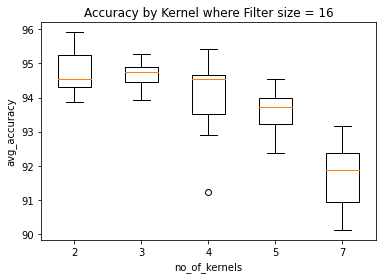

kernel=2: 94.727% (+/-0.640)
kernel=3: 94.645% (+/-0.416)
kernel=4: 94.032% (+/-1.177)
kernel=5: 93.614% (+/-0.588)
kernel=7: 91.635% (+/-0.977)


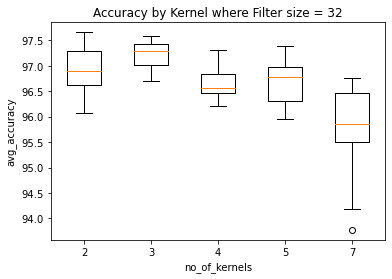

kernel=2: 96.941% (+/-0.444)
kernel=3: 97.223% (+/-0.303)
kernel=4: 96.676% (+/-0.327)
kernel=5: 96.678% (+/-0.437)
kernel=7: 95.684% (+/-0.961)


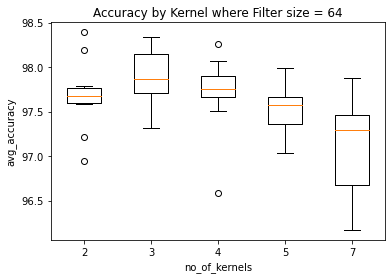

kernel=2: 97.674% (+/-0.395)
kernel=3: 97.900% (+/-0.307)
kernel=4: 97.703% (+/-0.423)
kernel=5: 97.514% (+/-0.273)
kernel=7: 97.099% (+/-0.513)


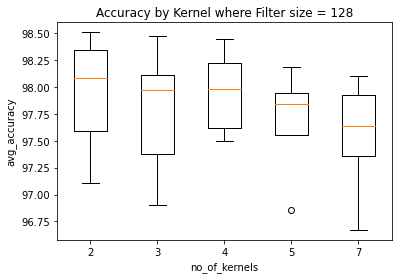

kernel=2: 97.965% (+/-0.449)
kernel=3: 97.819% (+/-0.500)
kernel=4: 97.940% (+/-0.319)
kernel=5: 97.736% (+/-0.363)
kernel=7: 97.571% (+/-0.417)


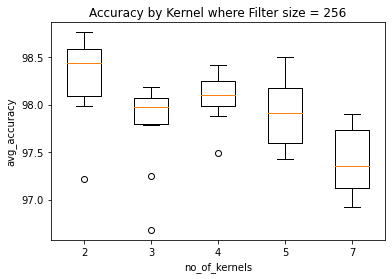

kernel=2: 98.276% (+/-0.430)
kernel=3: 97.788% (+/-0.447)
kernel=4: 98.077% (+/-0.254)
kernel=5: 97.913% (+/-0.332)
kernel=7: 97.399% (+/-0.354)


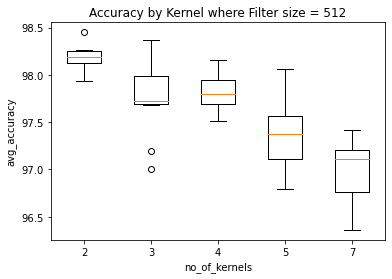

kernel=2: 98.179% (+/-0.136)
kernel=3: 97.742% (+/-0.382)
kernel=4: 97.824% (+/-0.197)
kernel=5: 97.364% (+/-0.357)
kernel=7: 96.993% (+/-0.319)


In [5]:
filters  = df.Filter.unique().tolist()
for f in filters: 
    f_scores = list() 
    df2 = df[df.Filter == f]
    kernels  = df2.Kernel.unique().tolist()
    for k in kernels:  
        k_scores = df2[df2.Kernel == k].Score.values.tolist()
        f_scores.append(k_scores)
    summarize_results(f_scores, kernels, f)


In [211]:
def summarize_by_kernel_size(scores, filter, kernel):
    #print(scores, kernel)
    # summarize mean and standard deviation
    
    # boxplot of scores
    fig = pyplot.figure()
    pyplot.boxplot(scores, labels=filter)
    pyplot.xlabel('no_of_filters')
    pyplot.ylabel('avg_accuracy')
    pyplot.title('Accuracy by filter where Kernel size = ' + str(kernel))
    pyplot.show()
    fig.clear()
    pyplot.close('all')
    pyplot.close(fig)
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print('filter=%d: %.3f%% (+/-%.3f)' % (filter[i], m, s))
    #fig.savefig('/content/drive/My Drive/HAR_Project/images/baseline_model/'+'20200822_cnn_lstm_filters_' + str(filter)+'.png')
    #pyplot.savefig('/content/drive/My Drive/HAR_Project/images/baseline_model'+'exp_cnn_lstm_filters_' + str(filter)+'.png')
    #fig.clear()
    #pyplot.close('all')
    #pyplot.close(fig)

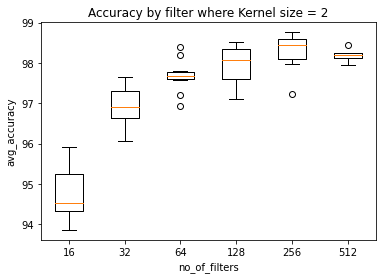

filter=16: 94.727% (+/-0.640)
filter=32: 96.941% (+/-0.444)
filter=64: 97.674% (+/-0.395)
filter=128: 97.965% (+/-0.449)
filter=256: 98.276% (+/-0.430)
filter=512: 98.179% (+/-0.136)


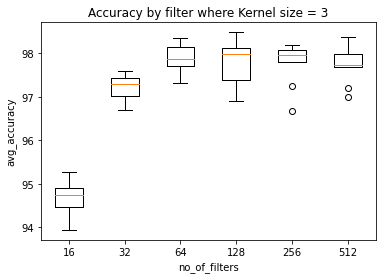

filter=16: 94.645% (+/-0.416)
filter=32: 97.223% (+/-0.303)
filter=64: 97.900% (+/-0.307)
filter=128: 97.819% (+/-0.500)
filter=256: 97.788% (+/-0.447)
filter=512: 97.742% (+/-0.382)


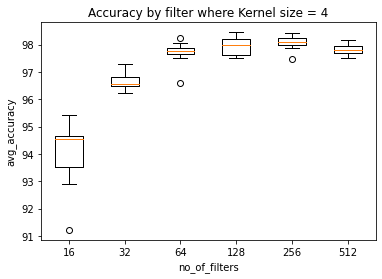

filter=16: 94.032% (+/-1.177)
filter=32: 96.676% (+/-0.327)
filter=64: 97.703% (+/-0.423)
filter=128: 97.940% (+/-0.319)
filter=256: 98.077% (+/-0.254)
filter=512: 97.824% (+/-0.197)


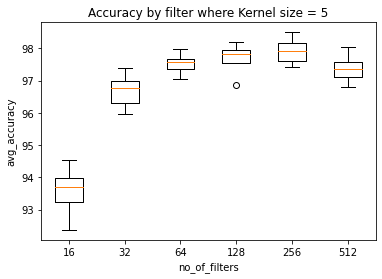

filter=16: 93.614% (+/-0.588)
filter=32: 96.678% (+/-0.437)
filter=64: 97.514% (+/-0.273)
filter=128: 97.736% (+/-0.363)
filter=256: 97.913% (+/-0.332)
filter=512: 97.364% (+/-0.357)


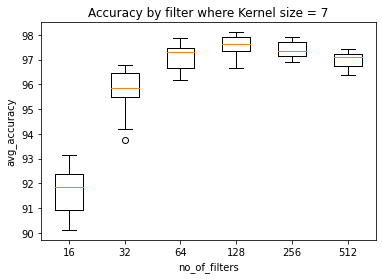

filter=16: 91.635% (+/-0.977)
filter=32: 95.684% (+/-0.961)
filter=64: 97.099% (+/-0.513)
filter=128: 97.571% (+/-0.417)
filter=256: 97.399% (+/-0.354)
filter=512: 96.993% (+/-0.319)


In [212]:
#filters  = df.Filter.unique().tolist()
kernels  = df.Kernel.unique().tolist()
for k in kernels: 
    f_scores = list() 
    df2 = df[df.Kernel == k]
    filters  = df2.Filter.unique().tolist()
    for f in filters:  
        k_scores = df2[df2.Filter == f].Score.values.tolist()
        f_scores.append(k_scores)
    summarize_by_kernel_size(f_scores, filters, k)


<Figure size 432x288 with 0 Axes>

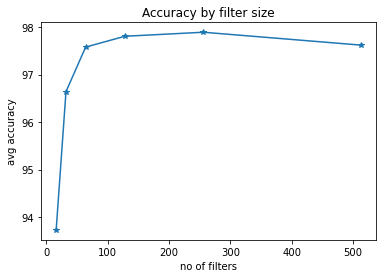

In [198]:
fig = pyplot.figure()
fig = df[['Filter','Score']].groupby('Filter').agg(['mean']).plot(legend=False, style='*-')
pyplot.xlabel('no of filters')
pyplot.ylabel('avg accuracy')
pyplot.title('Accuracy by filter size')
pyplot.show()
fig.clear()

<Figure size 432x288 with 0 Axes>

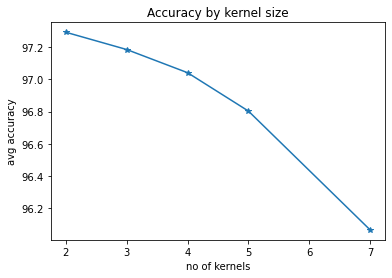

In [213]:
fig = pyplot.figure()
fig = df[['Kernel','Score']].groupby('Kernel').agg(['mean']).plot(legend=False, style='*-')
pyplot.xlabel('no of kernels')
pyplot.ylabel('avg accuracy')
pyplot.title('Accuracy by kernel size')
pyplot.show()
fig.clear()


    ## Window Length Experiment Result

In [200]:
#Load result data

filepath = '../Output/window_length_batch_size.csv'
df = pd.read_csv(filepath)

In [201]:
df.head()

,Window,Batch,Score
0,32,16,95.19
1,32,16,94.42
2,32,16,92.87
3,32,16,95.49
4,32,16,94.36


In [67]:

def summarize_sliding_window(scores, batch_size, window_length):
    #print(scores, kernel)
    # summarize mean and standard deviation
    
    # boxplot of scores
    fig = pyplot.figure()
    pyplot.boxplot(scores, labels=batch_size)
    pyplot.xlabel('Batch Size')
    pyplot.ylabel('avg_accuracy')
    pyplot.title('Accuracy by Batch size where Window Length = ' + str(window_length))
    pyplot.show()
    fig.clear()
    pyplot.close('all')
    pyplot.close(fig)
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print('Batch Size=%d: %.3f%% (+/-%.3f)' % (batch_size[i], m, s))
    #fig.savefig('/content/drive/My Drive/HAR_Project/images/baseline_model/'+'20200822_cnn_lstm_filters_' + str(filter)+'.png')
    #pyplot.savefig('/content/drive/My Drive/HAR_Project/images/baseline_model'+'exp_cnn_lstm_filters_' + str(filter)+'.png')
    #fig.clear()
    #pyplot.close('all')
    #pyplot.close(fig)

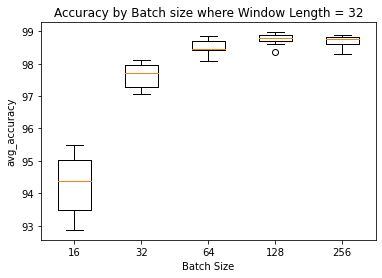

Batch Size=16: 94.197% (+/-0.908)
Batch Size=32: 97.625% (+/-0.372)
Batch Size=64: 98.518% (+/-0.216)
Batch Size=128: 98.767% (+/-0.171)
Batch Size=256: 98.684% (+/-0.175)


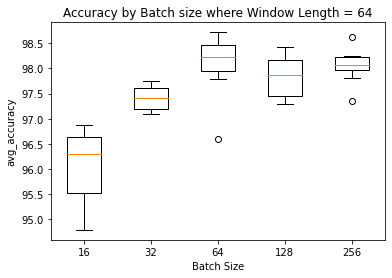

Batch Size=16: 96.061% (+/-0.690)
Batch Size=32: 97.413% (+/-0.229)
Batch Size=64: 98.092% (+/-0.576)
Batch Size=128: 97.853% (+/-0.399)
Batch Size=256: 98.055% (+/-0.314)


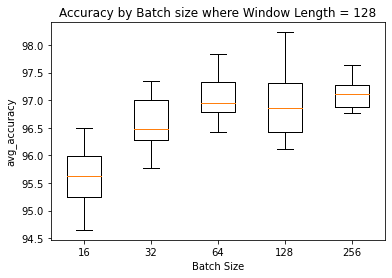

Batch Size=16: 95.600% (+/-0.517)
Batch Size=32: 96.576% (+/-0.509)
Batch Size=64: 97.063% (+/-0.406)
Batch Size=128: 97.003% (+/-0.691)
Batch Size=256: 97.103% (+/-0.266)


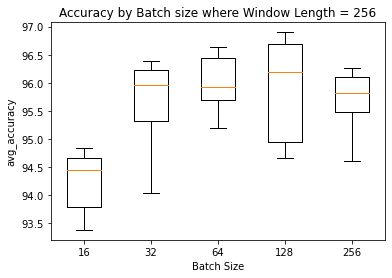

Batch Size=16: 94.254% (+/-0.502)
Batch Size=32: 95.667% (+/-0.712)
Batch Size=64: 96.008% (+/-0.465)
Batch Size=128: 95.907% (+/-0.882)
Batch Size=256: 95.710% (+/-0.486)


In [68]:
windows  = df.Window.unique().tolist()
for w in windows: 
    f_scores = list()
    df2 = df[df.Window == w]
    batches = df2.Batch.unique().tolist()
    for b in batches:        
        scores = df2[df2.Batch == b].Score.values.tolist()
        f_scores.append(scores)
    
    summarize_sliding_window(f_scores, batches, w)


In [69]:
df[['Window','Score']].groupby('Window').agg(['count','mean'])

Score         
       count     mean
Window               
32        50  97.5582
64        50  97.4948
128       50  96.6690
256       50  95.5092

<Figure size 432x288 with 0 Axes>

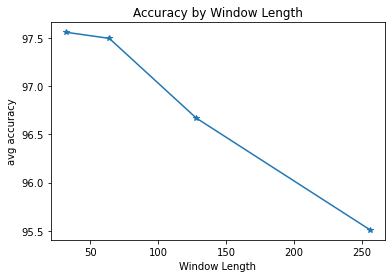

In [206]:
fig = pyplot.figure()
fig = df[['Window','Score']].groupby('Window').agg(['mean']).plot(legend=False, style='*-')
pyplot.xlabel('Window Length')
pyplot.ylabel('avg accuracy')
pyplot.title('Accuracy by Window Length')
pyplot.legend
pyplot.show()
fig.clear()

In [70]:
df[['Batch','Score']].groupby('Batch').agg(['count','mean'])

Score          
      count      mean
Batch                
16       40  95.02800
32       40  96.82025
64       40  97.42025
128      40  97.38250
256      40  97.38800

<Figure size 432x288 with 0 Axes>

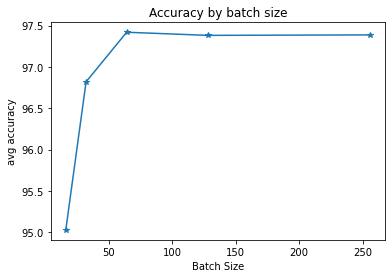

In [205]:
fig = pyplot.figure()
fig = df[['Batch','Score']].groupby('Batch').agg(['mean']).plot(legend=False, style='*-')
pyplot.xlabel('Batch Size')
pyplot.ylabel('avg accuracy')
pyplot.title('Accuracy by batch size')
pyplot.legend
pyplot.show()
fig.clear()